# More EDA

Additional EDA after some data proprocessing.

In [43]:
import pybaseball
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from pybaseball import playerid_reverse_lookup
from pybaseball import statcast
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

In [39]:
# Set max display options so that I can see everything I need to see
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 200)

In [36]:
pbp2019 = pd.read_csv('../data/processed/pitch_by_pitch_2019_cleaned.csv')
pbp2020 = pd.read_csv('../data/processed/pitch_by_pitch_2020_cleaned.csv')
pbp2021 = pd.read_csv('../data/processed/pitch_by_pitch_2021_cleaned.csv')
pbp2022 = pd.read_csv('../data/processed/pitch_by_pitch_2022_cleaned.csv')
pbp2023 = pd.read_csv('../data/processed/pitch_by_pitch_2023_cleaned.csv')
pbp2024 = pd.read_csv('../data/processed/pitch_by_pitch_2024_cleaned.csv')

The pitch-by-pitch dataset is now down to 45 features after some data cleaning. Before doing feature engineering I need to have a better understanding of the kind of information my remaining features contain.

As I've been doing so far, I'll be mainly using the 2019 dataset for EDA. The datasets for each season are fairly similar after all with 2020 having less data due to a COVID shortened season.

### Investigating the `pitcher` column

While looking at random samplings of the pitch-by-pitch data during preprocessing it occured to me that there may be pitchers in the datasets that probably have too few pitches over a season for them to be useful for my modelling. A quick check below proves this hunch correct.

In [ ]:
# Number of unique pitchers
pbp2019['pitcher'].value_counts()

pitcher
544931    3942
543037    3910
434378    3838
571578    3719
545333    3684
          ... 
602922       4
670078       3
663399       2
592407       1
670579       1
Name: count, Length: 883, dtype: int64

In [ ]:
# Some of the pitchers with the least pitches aren't even registered in MLB's database it seems
playerid_reverse_lookup([670579, 592407, 663399, 670078, 602922], key_type='mlbam')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,holaday,bryan,592407,holab001,holadbr01,11287,2012.0,2021.0
1,rondón,josé,602922,rondj002,rondojo02,14140,2016.0,2021.0
2,waddell,brandon,663399,waddb001,waddebr01,18347,2020.0,2021.0


In [33]:
# Create a boolean mask for pitchers with more than x pitches
pitcher_counts = pbp2019['pitcher'].value_counts()
mask = pbp2019['pitcher'].isin(pitcher_counts[pitcher_counts > 1000].index)

# Filter the dataframe using the mask
pbp2019_filtered = pbp2019.loc[mask]
pbp2019_filtered

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,game_type,stand,...,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,bat_score_diff,age_pit,age_bat,n_priorpa_thisgame_player_at_bat,any_on_base
0,SL,2019-10-30,87.9,-2.65,5.50,488726,543339,14.0,W,L,...,2,6,Infield shift,Standard,175.0,-4,32,32,4,0
1,FF,2019-10-30,95.9,-2.77,5.52,488726,543339,7.0,W,L,...,2,6,Infield shift,Standard,201.0,-4,32,32,4,0
2,FF,2019-10-30,96.5,-2.68,5.42,488726,543339,14.0,W,L,...,2,6,Infield shift,Standard,205.0,-4,32,32,4,0
3,FF,2019-10-30,96.0,-2.65,5.55,488726,543339,9.0,W,L,...,2,6,Infield shift,Standard,208.0,-4,32,32,4,0
4,SL,2019-10-30,86.7,-2.73,5.59,488726,543339,14.0,W,L,...,2,6,Infield shift,Standard,186.0,-4,32,32,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743782,SI,2019-03-20,91.8,-1.92,5.68,502517,605347,8.0,S,L,...,0,0,Infield shift,Standard,228.0,0,26,34,0,0
743783,FF,2019-03-20,92.7,-1.92,5.83,453568,605347,11.0,S,L,...,0,0,Infield shade,Standard,215.0,0,26,33,0,0
743784,SI,2019-03-20,93.0,-1.88,5.74,453568,605347,13.0,S,L,...,0,0,Infield shade,Standard,258.0,0,26,33,0,0
743785,FF,2019-03-20,93.7,-1.80,5.65,453568,605347,14.0,S,L,...,0,0,Infield shade,Standard,213.0,0,26,33,0,0


In [30]:
# Create a boolean mask for pitchers with more than x pitches
pitcher_counts = pbp2021['pitcher'].value_counts()
mask = pbp2021['pitcher'].isin(pitcher_counts[pitcher_counts > 1000].index)

# Filter the dataframe using the mask
pbp2021_filtered = pbp2021.loc[mask]
pbp2021_filtered

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,game_type,stand,...,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,bat_score_diff,age_pit,age_bat,n_priorpa_thisgame_player_at_bat,any_on_base
0,FF,2021-11-02,93.7,1.39,6.72,493329,519293,5.0,W,R,...,0,7,Standard,Standard,146.0,-7,32,37,3,0
1,FF,2021-11-02,92.9,1.38,6.72,493329,519293,5.0,W,R,...,0,7,Standard,Standard,145.0,-7,32,37,3,0
2,FF,2021-11-02,93.1,1.35,6.73,493329,519293,6.0,W,R,...,0,7,Standard,Standard,143.0,-7,32,37,3,0
3,FF,2021-11-02,94.6,1.31,6.73,670541,519293,5.0,W,L,...,0,7,Infield shift,Standard,140.0,-7,32,24,3,0
4,FF,2021-11-02,93.6,1.31,6.80,670541,519293,13.0,W,L,...,0,7,Infield shift,Standard,152.0,-7,32,24,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736044,FF,2021-03-15,90.1,-2.72,6.10,664057,607231,11.0,S,L,...,0,0,Standard,Strategic,224.0,0,29,27,0,0
736045,SI,2021-03-15,90.3,-2.71,6.05,664057,607231,2.0,S,L,...,0,0,Standard,Strategic,216.0,0,29,27,0,0
736046,SI,2021-03-15,91.0,-2.93,6.07,664057,607231,11.0,S,L,...,0,0,Standard,Strategic,223.0,0,29,27,0,0
736047,CH,2021-03-15,78.2,-2.45,6.17,664057,607231,8.0,S,L,...,0,0,Standard,Standard,239.0,0,29,27,0,0


In [31]:
# Create a boolean mask for pitchers with more than x pitches
pitcher_counts = pbp2022['pitcher'].value_counts()
mask = pbp2022['pitcher'].isin(pitcher_counts[pitcher_counts > 1000].index)

# Filter the dataframe using the mask
pbp2022_filtered = pbp2022.loc[mask]
pbp2022_filtered

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,game_type,stand,...,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,bat_score_diff,age_pit,age_bat,n_priorpa_thisgame_player_at_bat,any_on_base
7,KC,2022-11-05,86.4,-2.67,5.86,663656,502085,13.0,W,L,...,4,1,Infield shift,Standard,47.0,3,37,25,3,0
8,FC,2022-11-05,92.9,-2.61,5.86,663656,502085,7.0,W,L,...,4,1,Infield shift,Standard,204.0,3,37,25,3,0
9,SL,2022-11-05,80.7,-2.73,5.85,663656,502085,13.0,W,L,...,4,1,Infield shift,Standard,67.0,3,37,25,3,0
10,SL,2022-11-05,83.8,-2.84,5.79,663656,502085,11.0,W,L,...,4,1,Infield shift,Standard,66.0,3,37,25,3,0
11,KC,2022-11-05,82.6,-2.36,6.00,608324,502085,9.0,W,R,...,4,1,Infield shift,Standard,42.0,3,37,28,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731951,SL,2022-03-18,84.3,-2.18,5.93,606299,640444,6.0,S,R,...,1,0,Strategic,Strategic,83.0,1,28,28,0,0
731952,SI,2022-03-18,92.6,-1.75,6.14,650402,640444,11.0,S,R,...,0,0,Strategic,Strategic,197.0,0,28,26,0,0
731953,SL,2022-03-18,86.4,-2.12,5.95,650402,640444,14.0,S,R,...,0,0,Strategic,Strategic,95.0,0,28,26,0,0
731954,SL,2022-03-18,85.6,-2.06,5.95,650402,640444,14.0,S,R,...,0,0,Strategic,Strategic,84.0,0,28,26,0,0


Starting pitchers with a full healthy season may throw between 2500 to 3200 pitches while relief pitchers tend to have between 1000 to 1500 pitches over a season. Setting a threshold at 1000 pitches still leaves most of the entries in that datasets so I'll be filtering the data with that.

### `game_type`

- R = Regular Season
- S = Spring Training
- D = Division Series
- F = Wild Card Game
- L = League Championship Series
- W = World Series


In [41]:
pbp2019['game_type'].value_counts()

game_type
R    726157
S      6539
D      5431
L      2954
W      2152
F       560
Name: count, dtype: int64

Spring Training games are not considered "serious" games so I will be filtering those out of the datasets.

In [42]:
pbp2019.sample(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,game_type,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,game_pk,at_bat_number,pitch_number,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,bat_score_diff,age_pit,age_bat,n_priorpa_thisgame_player_at_bat,any_on_base
42205,SL,2019-09-22,79.7,2.73,5.26,664901,571510,13.0,R,R,L,0,2,-0.53,-0.44,-0.96,0.83,0,0,1,2,5,Top,-7.094789,-115.975518,-2.286743,-3.779023,17.452746,-36.053868,3.20,1.53,80.3,565587,46,3,3,5,Standard,Standard,310.0,-2,28,26,2,0
195800,SI,2019-08-15,91.3,-1.09,5.27,458708,573186,12.0,R,R,R,0,1,-0.88,0.50,0.89,2.69,0,0,0,2,4,Bot,6.763065,-132.823357,-1.712392,-11.552095,24.106725,-26.234327,3.41,1.53,90.8,567226,43,2,2,7,Standard,Standard,240.0,-5,28,35,1,0
21139,SL,2019-09-27,84.8,-2.17,5.82,457727,592716,14.0,R,R,R,1,0,0.35,-0.05,1.30,2.41,0,0,0,0,6,Top,7.370502,-123.412715,-1.600545,2.275073,22.016319,-32.621155,3.59,1.76,84.9,566846,46,2,6,2,Standard,Standard,82.0,4,28,32,2,0
370326,FF,2019-06-29,91.6,-1.19,6.00,547180,657141,13.0,R,L,R,1,1,-0.54,1.43,-0.91,2.02,0,1,0,1,1,Top,1.847009,-133.257530,-7.192234,-6.710602,28.561615,-14.038369,3.48,1.73,91.1,567401,3,3,0,0,Infield shift,Standard,201.0,0,23,27,0,0
162548,FF,2019-08-24,90.4,0.85,6.52,622110,607644,13.0,R,R,L,3,2,0.63,1.83,-0.25,1.51,0,0,0,0,1,Top,-4.078235,-131.303528,-10.423777,8.192900,27.640376,-9.011293,3.50,1.65,90.3,564996,1,6,0,0,Standard,Strategic,161.0,0,26,28,0,0
635934,FF,2019-04-23,94.6,-1.00,6.67,640461,658791,4.0,R,R,R,1,1,-0.77,1.56,-0.60,2.61,0,0,0,0,5,Bot,2.691234,-137.648945,-8.313384,-10.241804,27.055584,-11.059511,3.53,1.57,94.3,566100,47,3,8,2,Standard,Standard,206.0,6,26,27,2,0
220422,FF,2019-08-09,94.5,-1.60,6.37,622168,593140,9.0,R,R,R,0,0,-0.28,1.27,0.45,1.59,0,0,1,1,7,Bot,6.011445,-137.361449,-9.726737,-4.814998,27.068278,-14.013910,3.26,1.55,95.5,566622,55,1,2,2,Standard,Standard,192.0,0,26,24,0,0
609250,SL,2019-04-30,83.2,-2.42,6.53,621043,501381,8.0,R,R,R,0,1,-0.21,0.11,0.09,1.87,0,0,0,1,2,Top,6.169826,-120.938552,-4.357064,-3.402914,25.823882,-30.417868,3.56,1.79,82.9,566976,9,2,0,0,Infield shift,Standard,242.0,0,30,25,0,0
338785,FF,2019-07-07,96.4,-2.33,6.28,434158,592426,11.0,R,L,R,3,2,-0.47,1.33,-2.04,2.54,0,1,1,2,9,Top,1.879377,-140.457090,-7.522052,-6.743134,28.649232,-12.929288,3.06,1.42,97.6,567213,74,6,3,4,Infield shift,Standard,200.0,-1,28,38,0,0
100963,SL,2019-09-07,87.9,-2.28,5.69,592885,506433,14.0,R,L,R,1,1,0.45,-0.23,0.71,0.77,0,0,1,1,1,Bot,6.282598,-127.966735,-5.391809,3.847321,22.445146,-33.919669,3.21,1.66,88.0,567624,7,3,0,0,Standard,Standard,64.0,0,33,28,0,0


## Data Visualization

#### Pitch type distribution

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_97229/874848746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pitch_type_counts.index, y=pitch_type_counts.values, palette='coolwarm')


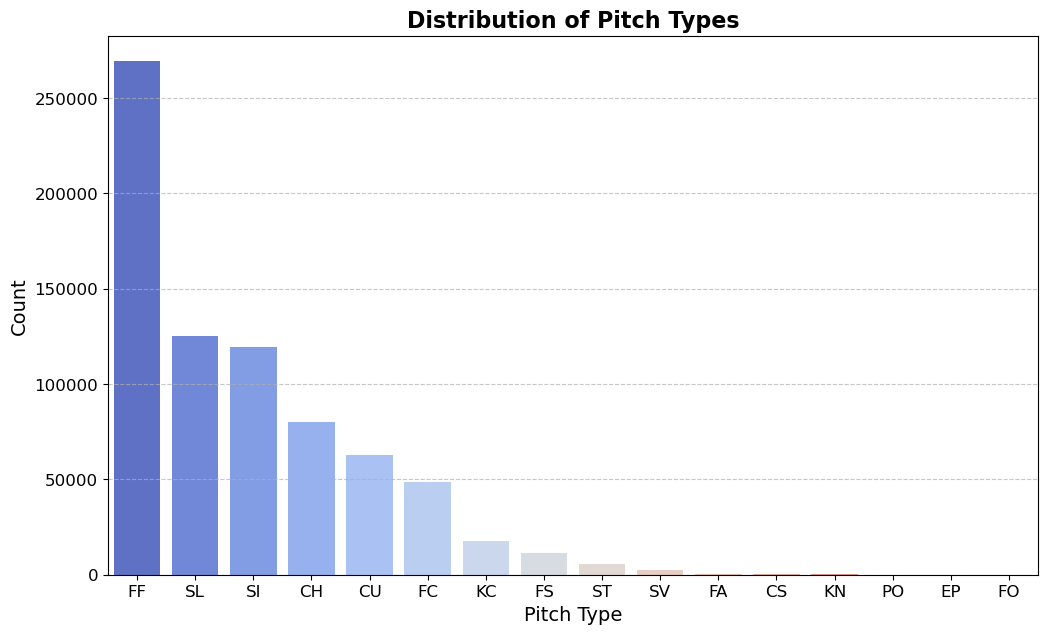

In [62]:
# Count plot for pitch types
pitch_type_counts = pbp2019['pitch_type'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=pitch_type_counts.index, y=pitch_type_counts.values, palette='coolwarm')
plt.title('Distribution of Pitch Types', fontsize=16, fontweight='bold')
plt.xlabel('Pitch Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Release speed distribution

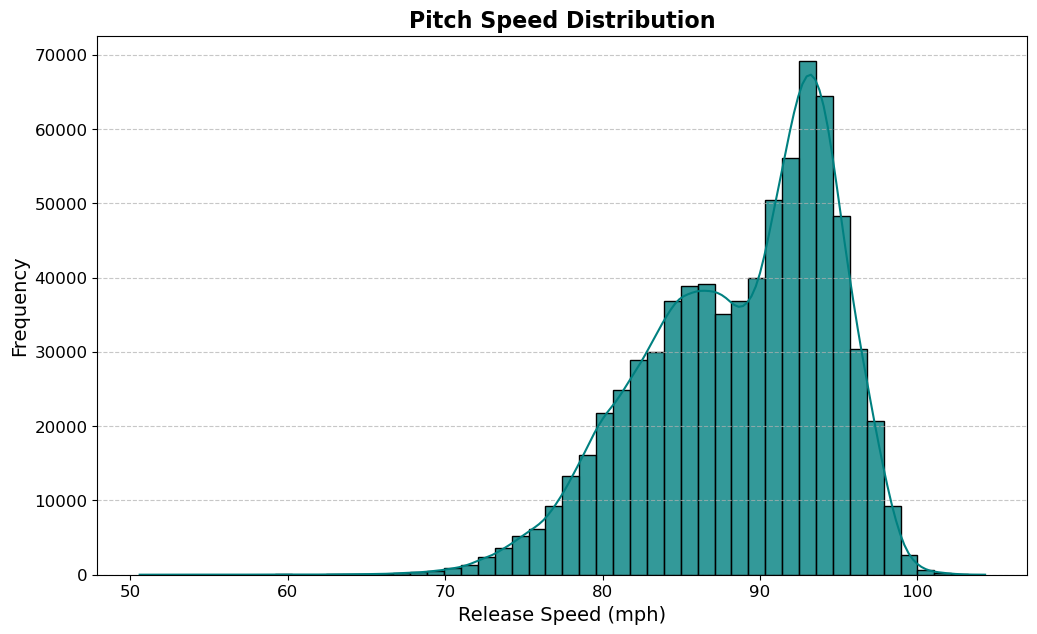

In [66]:
# Histogram for release speed
plt.figure(figsize=(12, 7))
sns.histplot(pbp2019['release_speed'].dropna(), bins=50, kde=True, color='teal', alpha=0.8)
plt.title('Pitch Speed Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Release Speed (mph)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Average speed by pitch type

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_97229/3511108421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_speed_by_type.index, y=avg_speed_by_type.values, palette='viridis')


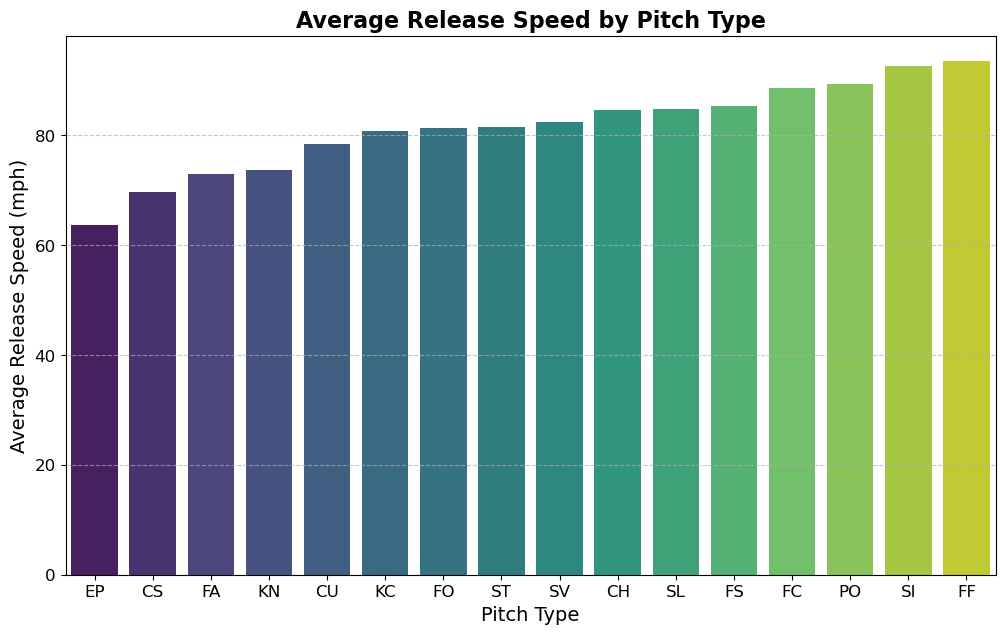

In [64]:
# Average release speed by pitch type
plt.figure(figsize=(12, 7))
avg_speed_by_type = pbp2019.groupby('pitch_type')['release_speed'].mean().sort_values()
sns.barplot(x=avg_speed_by_type.index, y=avg_speed_by_type.values, palette='viridis')
plt.title('Average Release Speed by Pitch Type', fontsize=16, fontweight='bold')
plt.xlabel('Pitch Type', fontsize=14)
plt.ylabel('Average Release Speed (mph)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Zone vs. release speed

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_97229/1915731419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pbp2019, x='zone', y='release_speed', palette='coolwarm')


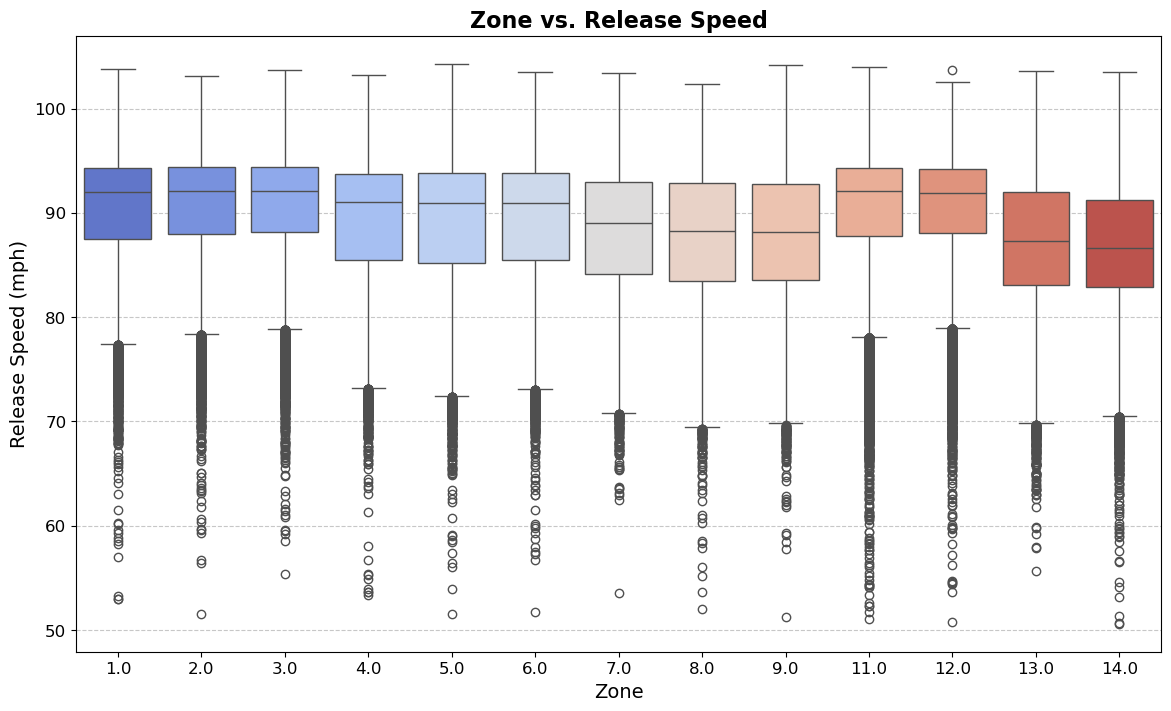

In [57]:
# Boxplot for zone vs. release speed
plt.figure(figsize=(14, 8))
sns.boxplot(data=pbp2019, x='zone', y='release_speed', palette='coolwarm')
plt.title('Zone vs. Release Speed', fontsize=16, fontweight='bold')
plt.xlabel('Zone', fontsize=14)
plt.ylabel('Release Speed (mph)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

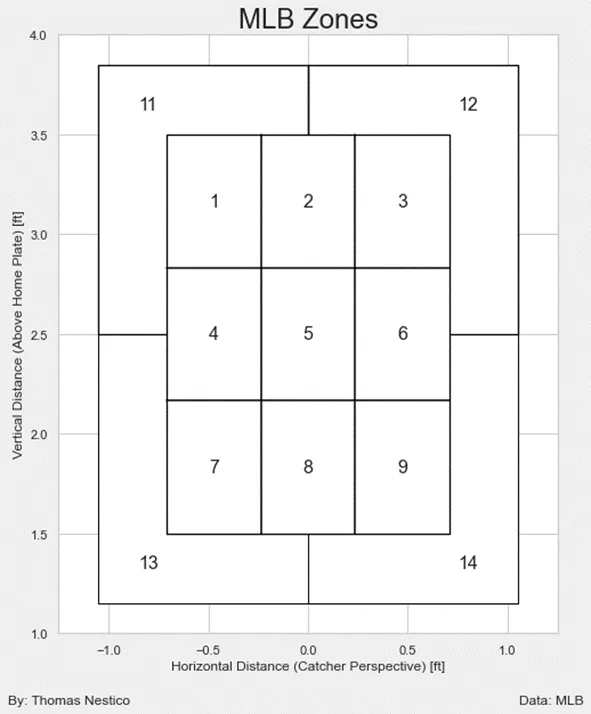

#### Strike vs. ball counts

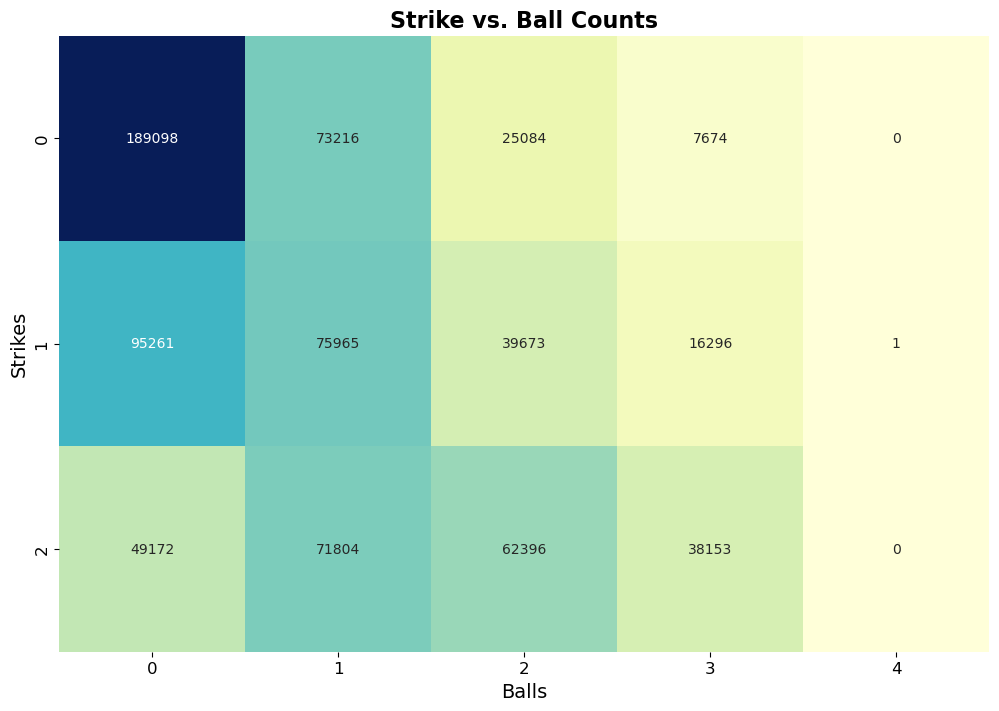

In [59]:
# Heatmap for strike vs. ball counts
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(pbp2019['strikes'], pbp2019['balls'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Strike vs. Ball Counts', fontsize=16, fontweight='bold')
plt.xlabel('Balls', fontsize=14)
plt.ylabel('Strikes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Number of pitches per inning

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_97229/2055166707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pitches_by_inning.index, y=pitches_by_inning.values, palette='plasma')


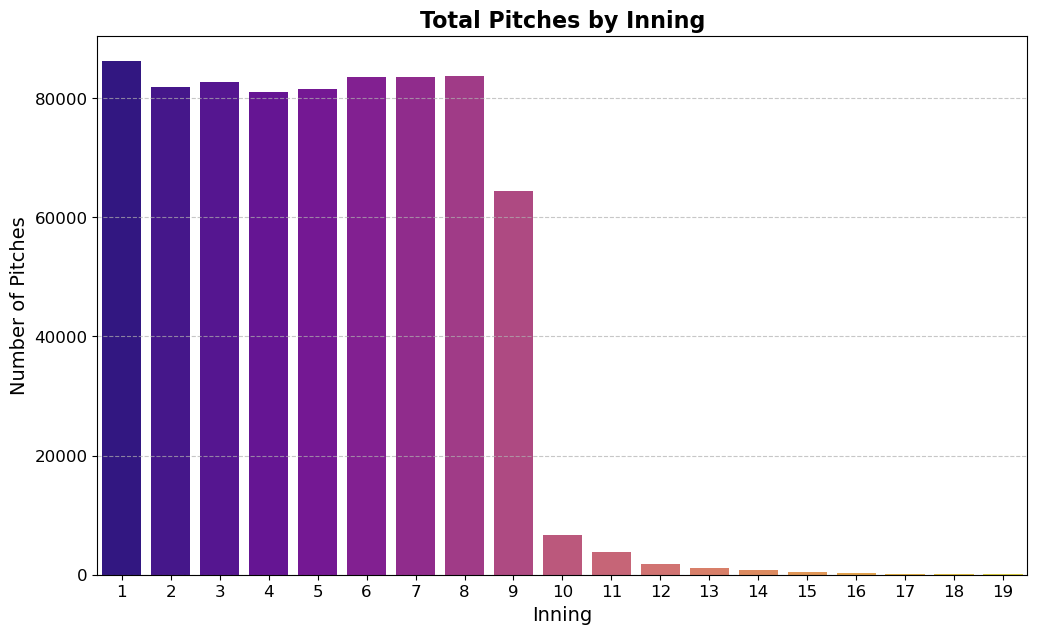

In [68]:
# Number of pitches by inning
plt.figure(figsize=(12, 7))
pitches_by_inning = pbp2019['inning'].value_counts().sort_index()
sns.barplot(x=pitches_by_inning.index, y=pitches_by_inning.values, palette='plasma')
plt.title('Total Pitches by Inning', fontsize=16, fontweight='bold')
plt.xlabel('Inning', fontsize=14)
plt.ylabel('Number of Pitches', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Pitches in Top vs Bottom of innings

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_97229/1734087460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inning_topbot_counts.index, y=inning_topbot_counts.values, palette='cubehelix')


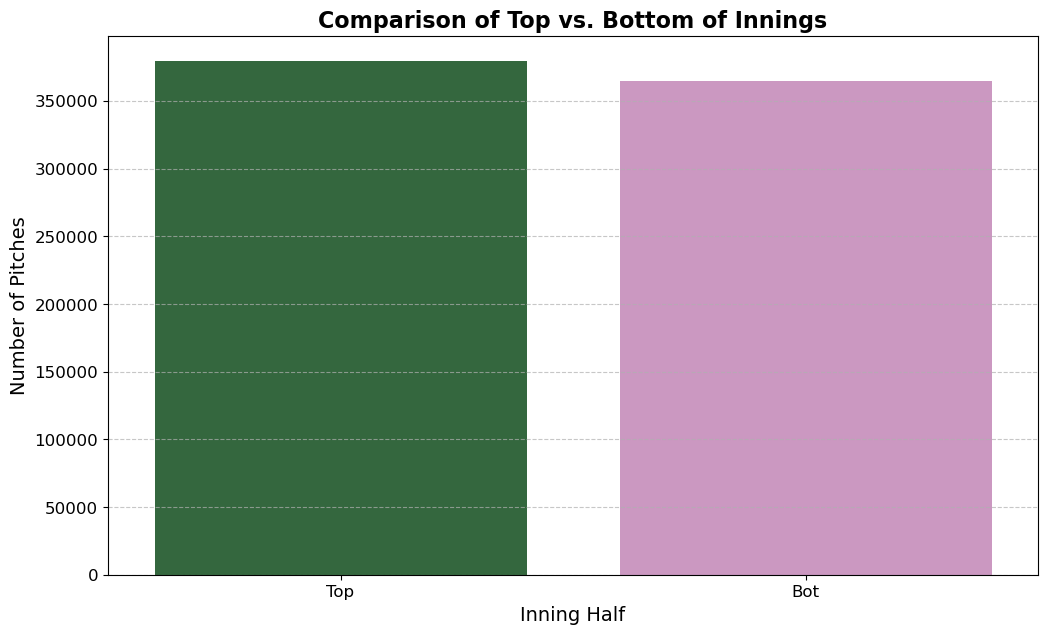

In [69]:
# Top vs. Bottom of innings
plt.figure(figsize=(12, 7))
inning_topbot_counts = pbp2019['inning_topbot'].value_counts()
sns.barplot(x=inning_topbot_counts.index, y=inning_topbot_counts.values, palette='cubehelix')
plt.title('Comparison of Top vs. Bottom of Innings', fontsize=16, fontweight='bold')
plt.xlabel('Inning Half', fontsize=14)
plt.ylabel('Number of Pitches', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Pitch type by batter handedness

<Figure size 1400x800 with 0 Axes>

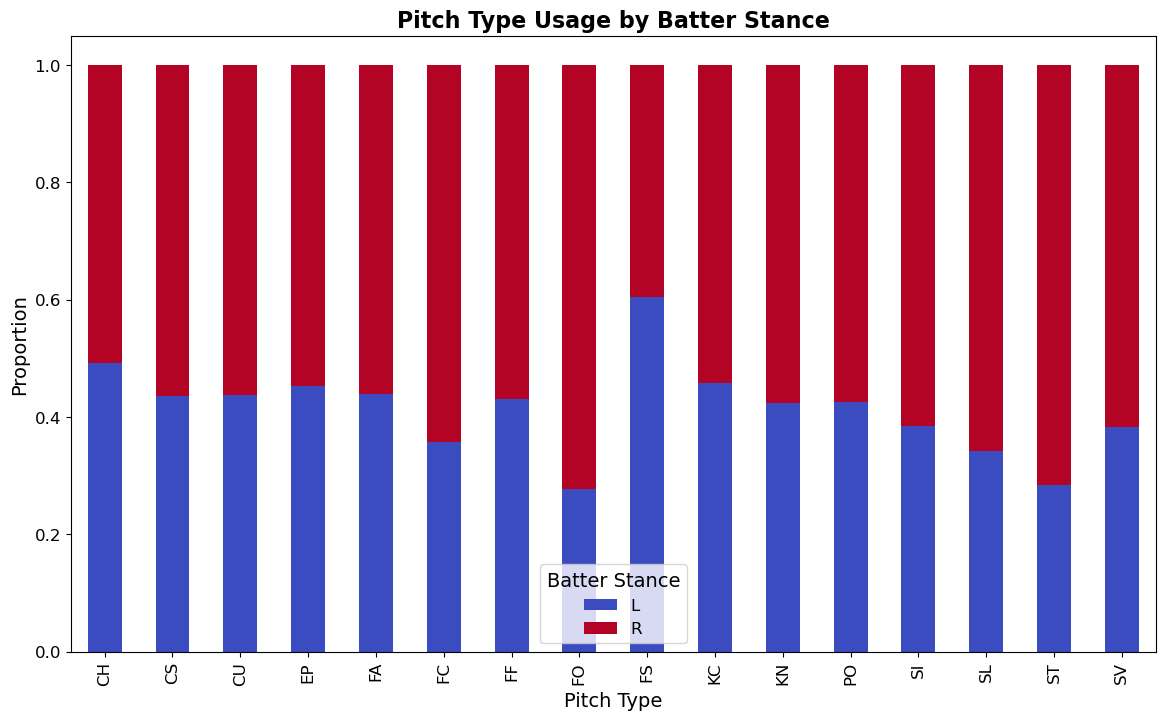

In [ ]:
# Pitch type usage by batter stance
plt.figure(figsize=(14, 8))
pitch_stance_data = pd.crosstab(pbp2019['pitch_type'], pbp2019['stand'])
pitch_stance_data = pitch_stance_data.div(pitch_stance_data.sum(axis=1), axis=0)
pitch_stance_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Pitch Type Usage by Batter Stance', fontsize=16, fontweight='bold')
plt.xlabel('Pitch Type', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Batter Stance', fontsize=12, title_fontsize=14)
plt.show()